In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 50,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.00605029,  0.1436711 ,  0.28119054,  0.41295895,  0.53488636,
        0.64437664,  0.73944843,  0.81808639,  0.87855673,  0.92034185,
        0.94462228,  0.95378113,  0.95047808,  0.93699789,  0.9150269 ,
        0.88566625,  0.84951532,  0.80674911,  0.75717348,  0.70025468,
        0.63513434,  0.56063968,  0.47531199,  0.3774915 ,  0.26553637,
        0.13831532, -0.00381312, -0.1573976 , -0.31418517, -0.46120694,
       -0.58469665, -0.67603981, -0.73445821, -0.76468468, -0.77302766,
       -0.7648741 , -0.74392951, -0.71234703, -0.6710813 , -0.62020802,
       -0.55916643, -0.48697165, -0.40246674, -0.30470136, -0.19349307,
       -0.0701133 ,  0.06219277,  0.19835132,  0.33254027,  0.45967573,
        0.57621598,  0.67979968,  0.76838458,  0.8399471 ,  0.89310539,
        0.92796803,  0.94623172,  0.95044065,  0.94312584,  0.92633128,
        0.90150094,  0.86952829,  0.83083916,  0.78546   ,  0.73306108,
        0.67298043,  0.60423446,  0.52553409,  0.43533027,  0.33

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   4.48800892e-01],
       [  2.00000000e+01,   4.07370418e-01],
       [  3.00000000e+01,   2.70156711e-01],
       [  4.00000000e+01,   1.40986606e-01],
       [  5.00000000e+01,   1.08255446e-01],
       [  6.00000000e+01,   9.62115452e-02],
       [  7.00000000e+01,   7.83093721e-02],
       [  8.00000000e+01,   6.07048273e-02],
       [  9.00000000e+01,   5.97998351e-02],
       [  1.00000000e+02,   4.00288962e-02],
       [  1.10000000e+02,   4.52583991e-02],
       [  1.20000000e+02,   3.55131663e-02],
       [  1.30000000e+02,   3.25631015e-02],
       [  1.40000000e+02,   3.06645799e-02],
       [  1.50000000e+02,   2.35128030e-02],
       [  1.60000000e+02,   2.51336619e-02],
       [  1.70000000e+02,   1.98220480e-02],
       [  1.80000000e+02,   1.73724350e-02],
       [  1.90000000e+02,   1.48066906e-02],
       [  2.00000000e+02,   1.32668493e-02],
       [  2.10000000e+02,   1.13069713e-02],
       [  2.20000000e+02,   1.25198746e-02],
       [  

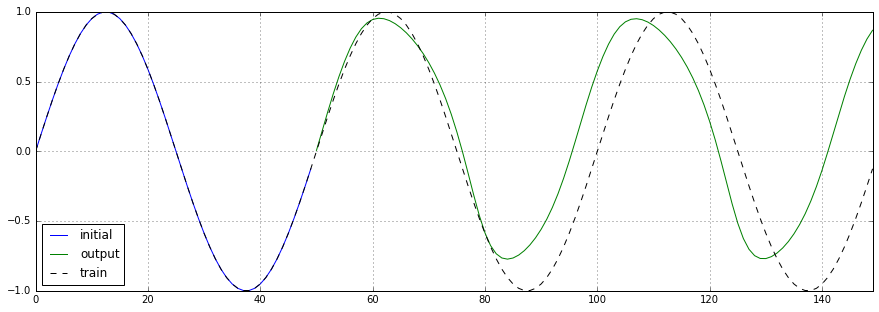

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

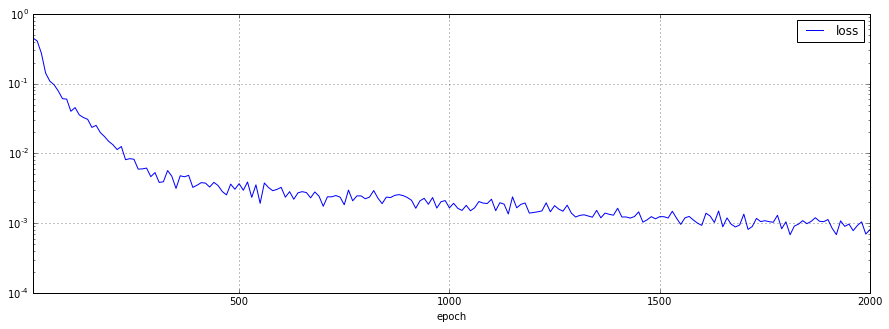

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")